In [1]:
from shapely import Point , LineString , LinearRing , Polygon , MultiPoint , MultiLineString , MultiPolygon

# shapely.ops.polygonize(lines)

### 返回一个由输入线构建的多边形的迭代器。

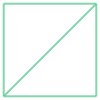

In [2]:
from shapely.ops import polygonize

coords = [((0, 0), (1, 1)),((0, 0), (0, 1)),((0, 1), (1, 1)),((1, 1), (1, 0)),((1, 0), (0, 0))]
lines = MultiLineString(coords)
lines

In [3]:
# 将相邻接的线合并成复合多边形
list(polygonize(lines))

[<POLYGON ((0 0, 1 1, 1 0, 0 0))>, <POLYGON ((1 1, 0 0, 0 1, 1 1))>]

In [4]:
list(polygonize(coords))

[<POLYGON ((0 0, 1 1, 1 0, 0 0))>, <POLYGON ((1 1, 0 0, 0 1, 1 1))>]

<AxesSubplot:>

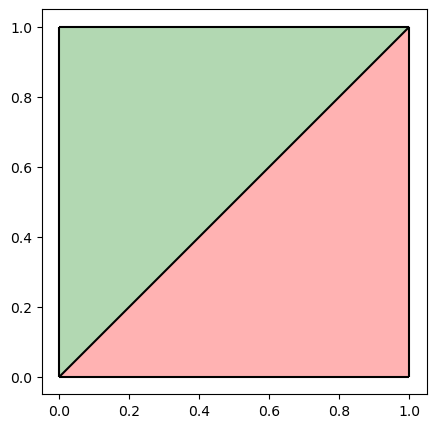

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

f,ax = plt.subplots(figsize=(5,5))

gpd.GeoDataFrame([lines] , columns=["geometry"]).plot(ax=ax , edgecolor="k")
gpd.GeoDataFrame([polygonize(lines)[0]] , columns=["geometry"]).plot(ax=ax , facecolor="red" , alpha=0.3)
gpd.GeoDataFrame([polygonize(lines)[1]] , columns=["geometry"]).plot(ax=ax , facecolor="green" , alpha=0.3)

# shapely.ops.polygonize_full(lines)

### 从线的源头创建多边形，返回多边形和剩余的几何对象

### 示例1：

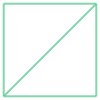

In [6]:
from shapely.ops import polygonize_full

coords = [((0, 0), (1, 1)),((0, 0), (0, 1)),((0, 1), (1, 1)),((1, 1), (1, 0)),((1, 0), (0, 0))]
lines = MultiLineString(coords)
lines

In [7]:
result, cuts, dangles, invalids = polygonize_full(lines)

In [8]:
len(result.geoms)

2

In [9]:
list(result.geoms)

[<POLYGON ((0 0, 1 1, 1 0, 0 0))>, <POLYGON ((1 1, 0 0, 0 1, 1 1))>]

In [10]:
list(cuts.geoms)

[]

In [11]:
list(dangles.geoms)

[]

In [12]:
list(invalids.geoms)

[]

### 示例2：

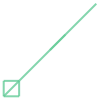

In [13]:
coords2= [((0, 0), (1, 1)),
        ((0, 0), (0, 1)),
        ((0, 1), (1, 1)),
        ((1, 1), (1, 0)),
        ((1, 0), (0, 0)),
        ((3, 3), (4, 4)),
        ((1, 1), (6, 6)),]

lines2 = MultiLineString(coords2)
lines2

In [14]:
result, cuts, dangles, invalids = polygonize_full(lines2)

In [15]:
list(result.geoms)

[<POLYGON ((0 0, 1 1, 1 0, 0 0))>, <POLYGON ((1 1, 0 0, 0 1, 1 1))>]

In [16]:
list(cuts.geoms)

[]

In [17]:
list(dangles.geoms)

[<LINESTRING (1 1, 6 6)>, <LINESTRING (3 3, 4 4)>]

In [18]:
list(invalids.geoms)

[]

<AxesSubplot:>

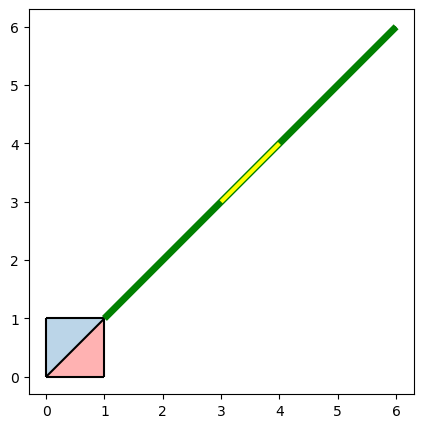

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt

f,ax = plt.subplots(figsize=(5,5))

gpd.GeoDataFrame([lines2] , columns=["geometry"]).plot(ax=ax , edgecolor="k")
gpd.GeoDataFrame([result.geoms[0]] , columns=["geometry"]).plot(ax=ax , facecolor="red" , alpha=0.3)
gpd.GeoDataFrame([result.geoms[1]] , columns=["geometry"]).plot(ax=ax ,  alpha=0.3)
gpd.GeoDataFrame([dangles.geoms[0]] , columns=["geometry"]).plot(ax=ax , edgecolor="green" , linewidth = 5)
gpd.GeoDataFrame([dangles.geoms[1]] , columns=["geometry"]).plot(ax=ax , edgecolor="yellow" , linewidth = 3)

# shapely.ops.linemerge(lines)

### 返回一个LineString或MultiLineString，代表所有相邻的线要素的合并。

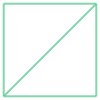

In [20]:
from shapely.ops import linemerge

lines

In [21]:
len(lines.geoms)

5

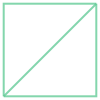

In [22]:
linemerge(lines)

In [23]:
len(linemerge(lines).geoms)

3

In [24]:
list(linemerge(lines).geoms)

[<LINESTRING (1 1, 1 0, 0 0)>,
 <LINESTRING (0 0, 1 1)>,
 <LINESTRING (0 0, 0 1, 1 1)>]

<AxesSubplot:>

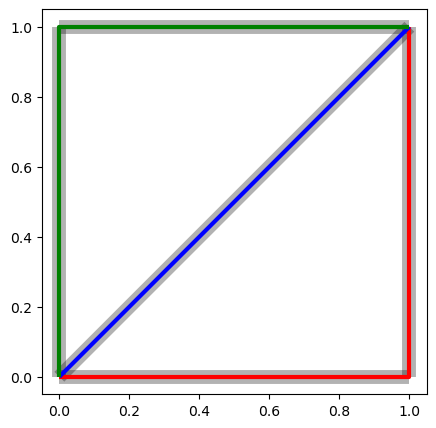

In [25]:
import geopandas as gpd
import matplotlib.pyplot as plt

f,ax = plt.subplots(figsize=(5,5))

gpd.GeoDataFrame([lines] , columns=["geometry"]).plot(ax=ax , edgecolor="k" ,alpha=0.3 ,  linewidth = 10)

gpd.GeoDataFrame([linemerge(lines).geoms[0]] , columns=["geometry"]).plot(ax=ax , edgecolor="red" , linewidth = 3)
gpd.GeoDataFrame([linemerge(lines).geoms[1]] , columns=["geometry"]).plot(ax=ax , edgecolor="blue" , linewidth = 3)
gpd.GeoDataFrame([linemerge(lines).geoms[2]] , columns=["geometry"]).plot(ax=ax , edgecolor="green" , linewidth = 3)